In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [3]:
file1="c:/temp/mid1.csv"
mid1=pd.read_csv(file1)
mid1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


In [4]:
file2="c:/temp/mid2.csv"
mid2=pd.read_csv(file2)
mid2

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat
0,24.000000,0.006,5.38,6.57,4.09,0,29.600000,15.300000,4.98
1,21.599001,0.027,4.69,6.42,4.97,0,24.200001,17.799999,9.14
2,34.700001,0.027,4.69,7.18,4.97,0,24.200001,17.799999,4.03
3,33.400002,0.032,4.58,7.00,6.06,0,22.200001,18.700001,2.94
4,36.199001,0.069,4.58,7.15,6.06,0,22.200001,18.700001,5.33
...,...,...,...,...,...,...,...,...,...
501,22.400000,0.063,5.73,6.59,2.48,0,27.299999,21.000000,9.67
502,20.600000,0.045,5.73,6.12,2.29,0,27.299999,21.000000,9.08
503,23.899000,0.061,5.73,6.98,2.17,0,27.299999,21.000000,5.64
504,22.000000,0.110,5.73,6.79,2.39,0,27.299999,21.000000,6.48


In [5]:
file3="c:/temp/mid3.csv"
mid3=pd.read_csv(file3)
mid3

,x1,x2,setosa
0,5.1,1.4,Yes
1,4.9,1.4,Yes
2,4.7,1.3,Yes
3,4.6,1.5,Yes
4,5.0,1.4,Yes
...,...,...,...
145,6.7,5.2,No
146,6.3,5.0,No
147,6.5,5.2,No
148,6.2,5.4,No


In [6]:
file4="c:/temp/mid4.csv"
mid4=pd.read_csv(file4)
mid4

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,B,12.320000,12.390000,78.849998
1,B,10.600000,18.950001,69.279999
2,B,11.040000,16.830000,70.919998
3,B,11.280000,13.390000,73.000000
4,B,15.190000,13.210000,97.650002
...,...,...,...,...
95,M,16.030001,15.510000,105.800000
96,B,12.960000,18.290001,84.180000
97,B,11.850000,17.459999,75.540001
98,B,10.180000,17.530001,65.120003


In [7]:
mid1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


In [9]:
mid1['Sales']

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [10]:
mid1.ndim

2

In [11]:
mid1.iloc[:,2:3]

,Income
0,73
1,48
2,35
3,100
4,64
...,...
395,108
396,23
397,26
398,79


In [12]:
mid['Sales','Age']

NameError: name 'mid' is not defined

In [13]:
mid2

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat
0,24.000000,0.006,5.38,6.57,4.09,0,29.600000,15.300000,4.98
1,21.599001,0.027,4.69,6.42,4.97,0,24.200001,17.799999,9.14
2,34.700001,0.027,4.69,7.18,4.97,0,24.200001,17.799999,4.03
3,33.400002,0.032,4.58,7.00,6.06,0,22.200001,18.700001,2.94
4,36.199001,0.069,4.58,7.15,6.06,0,22.200001,18.700001,5.33
...,...,...,...,...,...,...,...,...,...
501,22.400000,0.063,5.73,6.59,2.48,0,27.299999,21.000000,9.67
502,20.600000,0.045,5.73,6.12,2.29,0,27.299999,21.000000,9.08
503,23.899000,0.061,5.73,6.98,2.17,0,27.299999,21.000000,5.64
504,22.000000,0.110,5.73,6.79,2.39,0,27.299999,21.000000,6.48


In [16]:
x=np.linspace(1,10,100)
y=np.exp(x)

y=mid2['price']
x=mid2['rooms']
X=sm.add_constant(x)
y1=np.log(y)

result1=sm.OLS(y1,X).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     336.8
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           5.46e-58
Time:                        16:43:00   Log-Likelihood:                -135.93
No. Observations:                 506   AIC:                             275.9
Df Residuals:                     504   BIC:                             284.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7166      0.127      5.642      0.000       0.467       0.966
rooms          0.3687      0.020     18.352      0.000       0.329       0.408
==============================================================================
Omnibus:                       91.250   Durbin-Watson:                   0.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.341
Skew:                          -0.825   Prob(JB):                     2.00e-64
Kurtosis:                       6.345   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X1=[1,3]
result1.predict(X1)

array([1.82258913])

In [18]:
mid3

,x1,x2,setosa
0,5.1,1.4,Yes
1,4.9,1.4,Yes
2,4.7,1.3,Yes
3,4.6,1.5,Yes
4,5.0,1.4,Yes
...,...,...,...
145,6.7,5.2,No
146,6.3,5.0,No
147,6.5,5.2,No
148,6.2,5.4,No


In [19]:
mid4

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,B,12.320000,12.390000,78.849998
1,B,10.600000,18.950001,69.279999
2,B,11.040000,16.830000,70.919998
3,B,11.280000,13.390000,73.000000
4,B,15.190000,13.210000,97.650002
...,...,...,...,...
95,M,16.030001,15.510000,105.800000
96,B,12.960000,18.290001,84.180000
97,B,11.850000,17.459999,75.540001
98,B,10.180000,17.530001,65.120003


In [22]:
# y: diagnosis , x= 세개 다, k=3 min-max
# pd.value_counts(y_pred) B:

X1=mid4.iloc[:,2:5]
X1


,texture_mean,perimeter_mean
0,12.390000,78.849998
1,18.950001,69.279999
2,16.830000,70.919998
3,13.390000,73.000000
4,13.210000,97.650002
...,...,...
95,15.510000,105.800000
96,18.290001,84.180000
97,17.459999,75.540001
98,17.530001,65.120003


In [44]:
# y: diagnosis , x= 세개 다, k=3 min-max
# pd.value_counts(y_pred) B:

X1=mid4.iloc[:,2:5]

scaler=preprocessing.MinMaxScaler()
X11=scaler.fit_transform(X1)
y=mid4['diagnosis']

clf=KNeighborsClassifier(n_neighbors=3)
result=clf.fit(X1,y)

y_pred=clf.predict(X1)
y_pred


array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M'], dtype=object)

In [45]:
pd.value_counts(y_pred)

B    67
M    33
dtype: int64

In [46]:
confusion_matrix(y,y_pred)

array([[62,  5],
       [ 5, 28]], dtype=int64)

In [47]:
#k=3
(62+28)/(100)

0.9

In [48]:
62+5+5+28

100

In [51]:
X1=mid4.iloc[:,2:5]

scaler=preprocessing.MinMaxScaler()
X11=scaler.fit_transform(X1)
y=mid4['diagnosis']

clf2=KNeighborsClassifier(n_neighbors=4)
result=clf2.fit(X1,y)

y_pred2=clf2.predict(X1)

confusion_matrix(y,y_pred2)

array([[64,  3],
       [ 9, 24]], dtype=int64)

In [52]:
(64+24)/100

0.88

In [53]:
X1=mid4.iloc[:,2:5]

scaler=preprocessing.MinMaxScaler()
X11=scaler.fit_transform(X1)
y=mid4['diagnosis']

clf3=KNeighborsClassifier(n_neighbors=5)
result=clf3.fit(X1,y)

y_pred3=clf3.predict(X1)

confusion_matrix(y,y_pred3)

array([[64,  3],
       [ 8, 25]], dtype=int64)

In [54]:
(64+25)/100

0.89

In [55]:
X1=mid4.iloc[:,2:5]

scaler=preprocessing.MinMaxScaler()
X11=scaler.fit_transform(X1)
y=mid4['diagnosis']

clf4=KNeighborsClassifier(n_neighbors=6)
result=clf4.fit(X1,y)

y_pred4=clf4.predict(X1)

confusion_matrix(y,y_pred4)

array([[65,  2],
       [ 9, 24]], dtype=int64)

In [56]:
(65+24)/100

0.89

In [ ]:
clff=LogisticRegression(penalty='none', solver='newton-cg').fit(x,y)
clff

In [57]:
mid3

,x1,x2,setosa
0,5.1,1.4,Yes
1,4.9,1.4,Yes
2,4.7,1.3,Yes
3,4.6,1.5,Yes
4,5.0,1.4,Yes
...,...,...,...
145,6.7,5.2,No
146,6.3,5.0,No
147,6.5,5.2,No
148,6.2,5.4,No


In [58]:
x=mid3[['x1','x2']]
y=mid3['setosa']
y=pd.get_dummies(y)
y=y['Yes']
y

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: Yes, Length: 150, dtype: uint8

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)


clf=LogisticRegression(penalty='none', solver='newton-cg').fit(x_train,y_train)
clf

LogisticRegression(penalty='none', solver='newton-cg')

In [62]:
yhat_test=clf.predict(x_test)
yhat_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1], dtype=uint8)

In [63]:
clf.coef_

array([[-5.06754984, -2.63942291]])

In [86]:
pred9==clf.predict_proba('x1'=5.01,'x2'=2.41)
pred9

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2386860546.py, line 1)

In [82]:
clf.intercept_

array([34.49805401])

In [71]:
pred1=clf.predict_proba(x_test)
pred1

array([[9.99764789e-01, 2.35210924e-04],
       [9.98445331e-01, 1.55466909e-03],
       [5.06259873e-02, 9.49374013e-01],
       [9.99999995e-01, 4.95224064e-09],
       [5.47991646e-03, 9.94520084e-01],
       [9.99998264e-01, 1.73578604e-06],
       [3.23961788e-03, 9.96760382e-01],
       [9.99992931e-01, 7.06877662e-06],
       [9.99996729e-01, 3.27065695e-06],
       [9.99062814e-01, 9.37186008e-04],
       [9.99986254e-01, 1.37457442e-05],
       [9.99945195e-01, 5.48053148e-05],
       [9.99852168e-01, 1.47831935e-04],
       [9.99974641e-01, 2.53586557e-05],
       [9.99852168e-01, 1.47831935e-04],
       [2.54299328e-03, 9.97457007e-01],
       [9.99584099e-01, 4.15900662e-04],
       [9.93219704e-01, 6.78029566e-03],
       [1.53357076e-03, 9.98466429e-01],
       [2.40791639e-02, 9.75920836e-01],
       [9.98902253e-01, 1.09774691e-03],
       [9.96851349e-01, 3.14865057e-03],
       [5.71511002e-03, 9.94284890e-01],
       [2.02282681e-04, 9.99797717e-01],
       [9.999315

In [72]:
pred2=clf.predict(x_test)
pd.value_counts(pred2)

0    29
1    16
dtype: int64

In [73]:
confusion_matrix(y_test,pred2)

array([[28,  1],
       [ 1, 15]], dtype=int64)

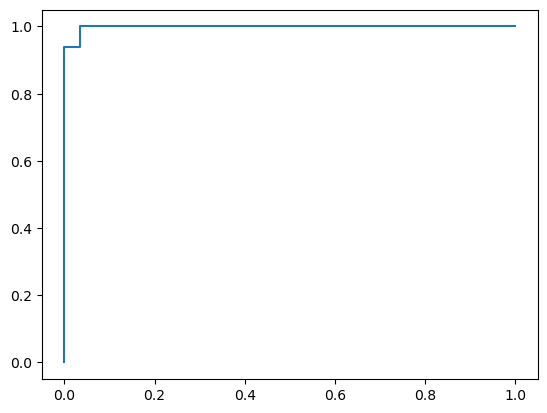

In [74]:
# roc 그리기

fpr, tpr, thresholds=roc_curve(y_test,pred1[:,1])
plt.plot(fpr, tpr)
plt.show()

In [75]:
#auc
roc_auc_score(y_test,pred1[:,1])

0.9978448275862069

In [76]:
mid1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


In [79]:
mid1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
# [-5.06754984, -2.63942291]])

In [83]:
(-5.06754984)*(5.01)+(-2.63942291)*(2.41)+34.49805401

2.748620098499998